# Energy data analysis

## Imports

In [62]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing [Energy data](https://github.com/LuisM78/Appliances-energy-prediction-data)

In [63]:
Energy_data = pd.read_csv("Portfolio2_data/energydata_complete.csv")
Energy_data['date'] = pd.to_datetime(Energy_data['date'])
Energy_data.index = Energy_data['date']
Energy_data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Variables

**Here are the definitions of the important fields in the data**:
* date time year-month-day hour:minute:second 
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chièvres weather station), in Celsius
* Pressure (from Chièvres weather station), in mm Hg
* RH_out, Humidity outside (from Chièvres weather station), in %
* Windspeed (from Chièvres weather station), in m/s
* Visibility (from Chièvres weather station), in km
* Tdewpoint (from Chièvres weather station), °C
* rv1, Random variable 1, nondimensional
* rv2, Rnadom variable 2, nondimensional

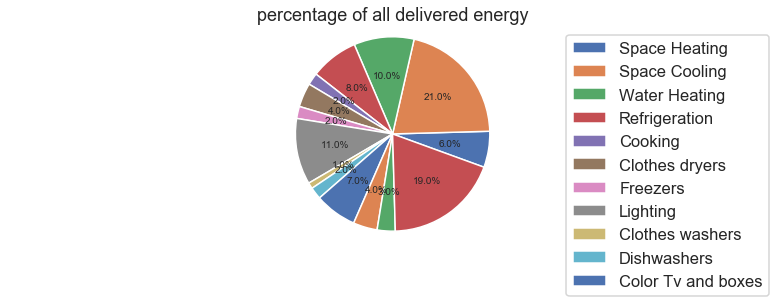

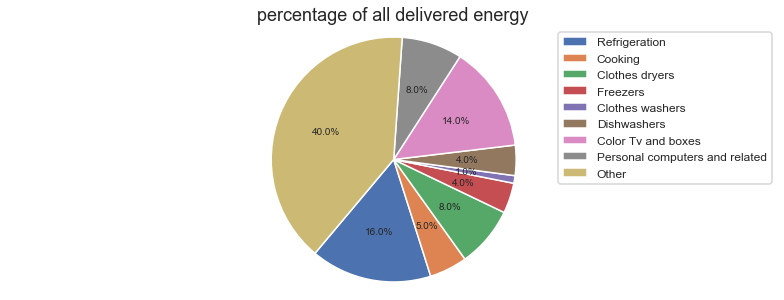

In [65]:
#1st pie chart for Residential electrical energy consumption
labels_one= ['Space Heating', 'Space Cooling', 'Water Heating', 'Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers',
         'Lighting', 'Clothes washers', 'Dishwashers', 'Color Tv and boxes']
sizes_label_1 = [6, 21, 10, 8, 2, 4, 2, 11, 1, 2, 7,4,3,19]

fig1, ax1 = plt.subplots(figsize=(11,4))


patches, texts, autotexts = ax1.pie(sizes_label_1,autopct='%1.1f%%', startangle=340,)
plt.legend(patches, labels_one, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("percentage of all delivered energy")
plt.show()

#2nd pie chart for Residential electrical energy consumption  
#Note: Space heating, Space cooling, Lighting and Water Heating contributions have been removed from their pie chart
labels_two =['Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers', 'Clothes washers', 'Dishwashers',
             'Color Tv and boxes', 'Personal computers and related', 'Other']
sizes_label_2 = [16, 5, 8, 4, 1, 4, 14, 8, 40]

fig2, ax2 = plt.subplots(figsize=(11,4))


patches, texts, autotexts = ax2.pie(sizes_label_2,autopct='%1.1f%%', startangle=230,)
plt.legend(patches, labels_two, loc="best",prop={'size': 12})
ax2.axis('equal')  
plt.tight_layout()
plt.title("percentage of all delivered energy")
plt.show()

## Pairplot

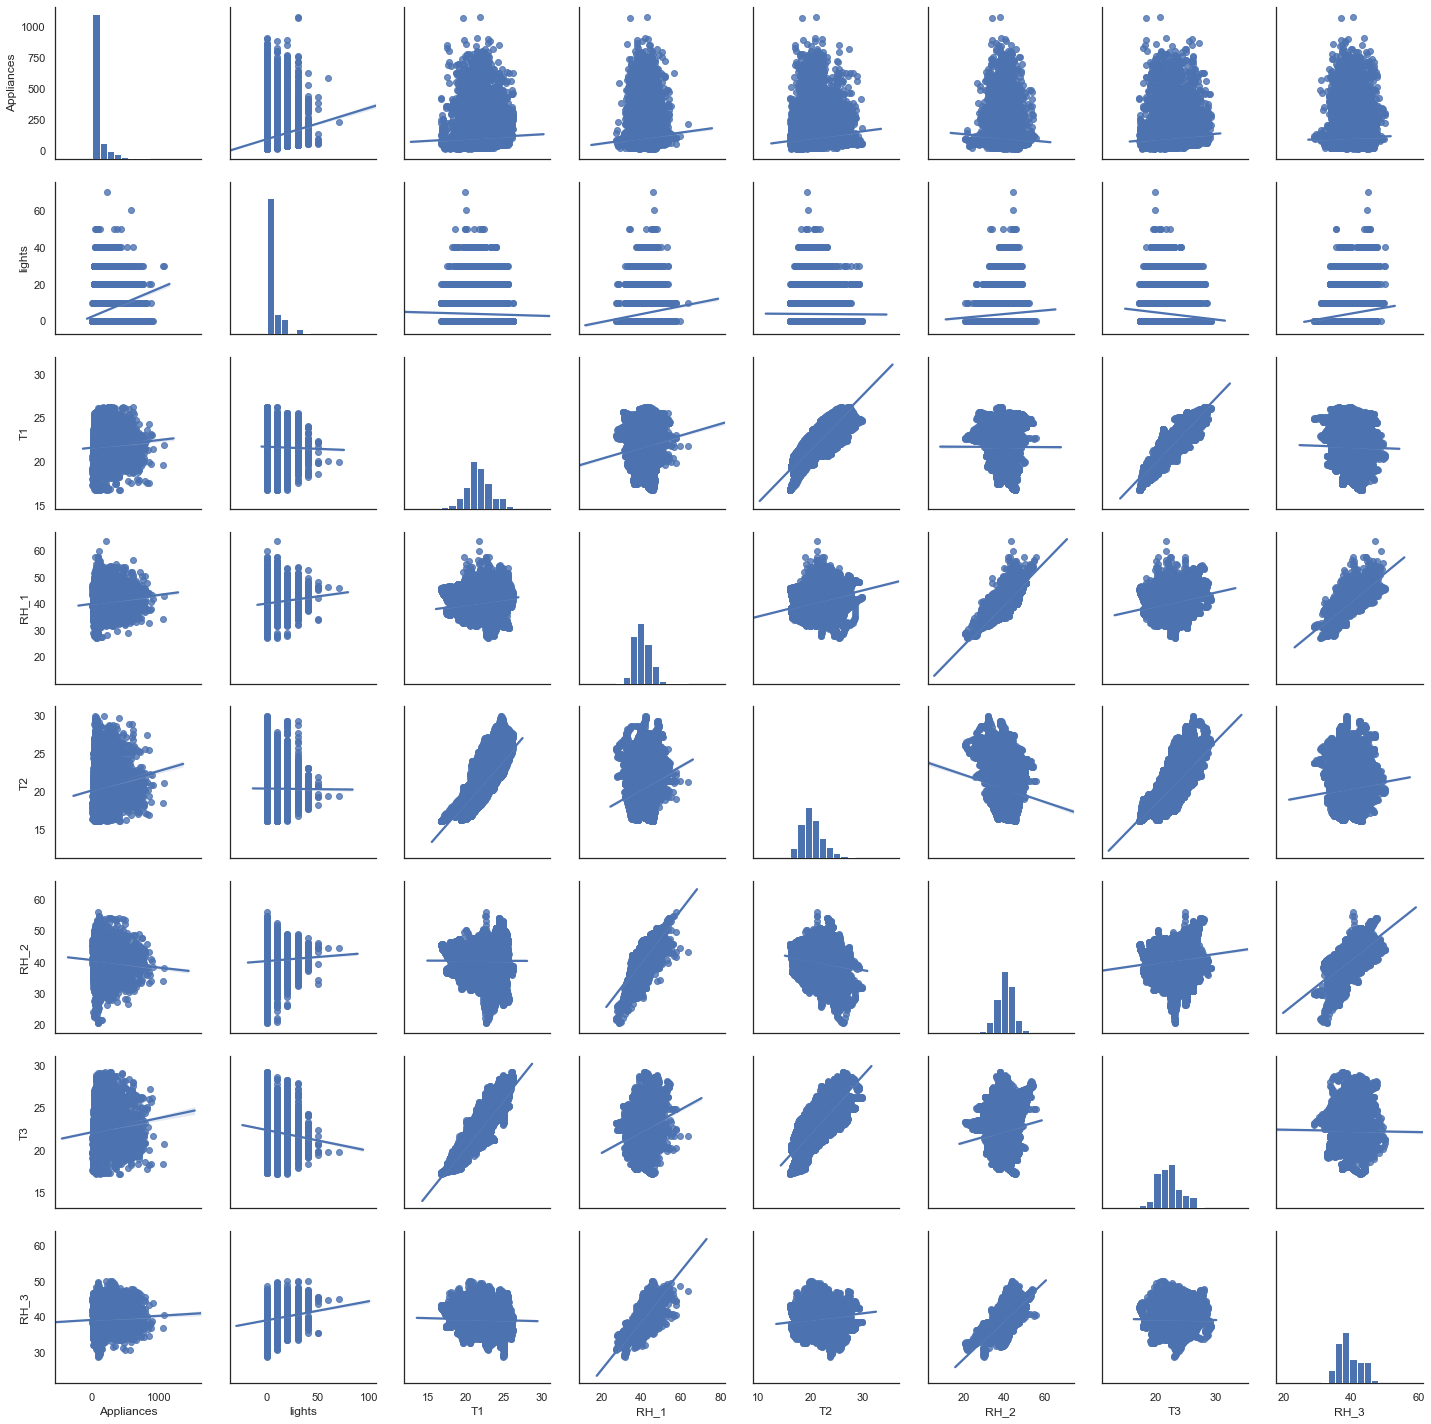

In [29]:
#pair plots for Relationship between the energy consumption of appliances with: 
#lights, T1, RH1, T2, RH2, T3, RH3. T1 and RH1 correspond to the kitchen conditions; T2 and 
#RH2 correspond to the living room conditions
multiplots = sns.pairplot(Energy_data[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']], 
                          kind="reg", diag_kind='hist')

## Histogram and boxplot

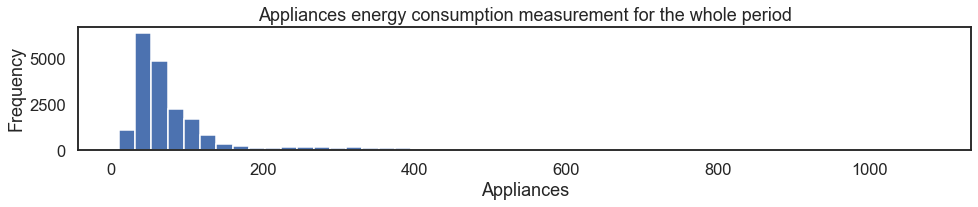

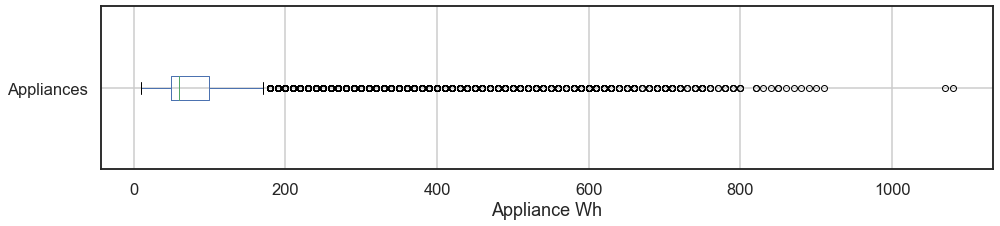

In [66]:
# histogram for appliances and boxplot

# histogram
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(2,1,1)
g = ax.hist(Energy_data['Appliances'], bins =50)
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.show()

# boxplot
Energy_data.boxplot(column='Appliances', vert=False, figsize=(16,3))
plt.xlabel("Appliance Wh")
plt.show()

## Heatmap

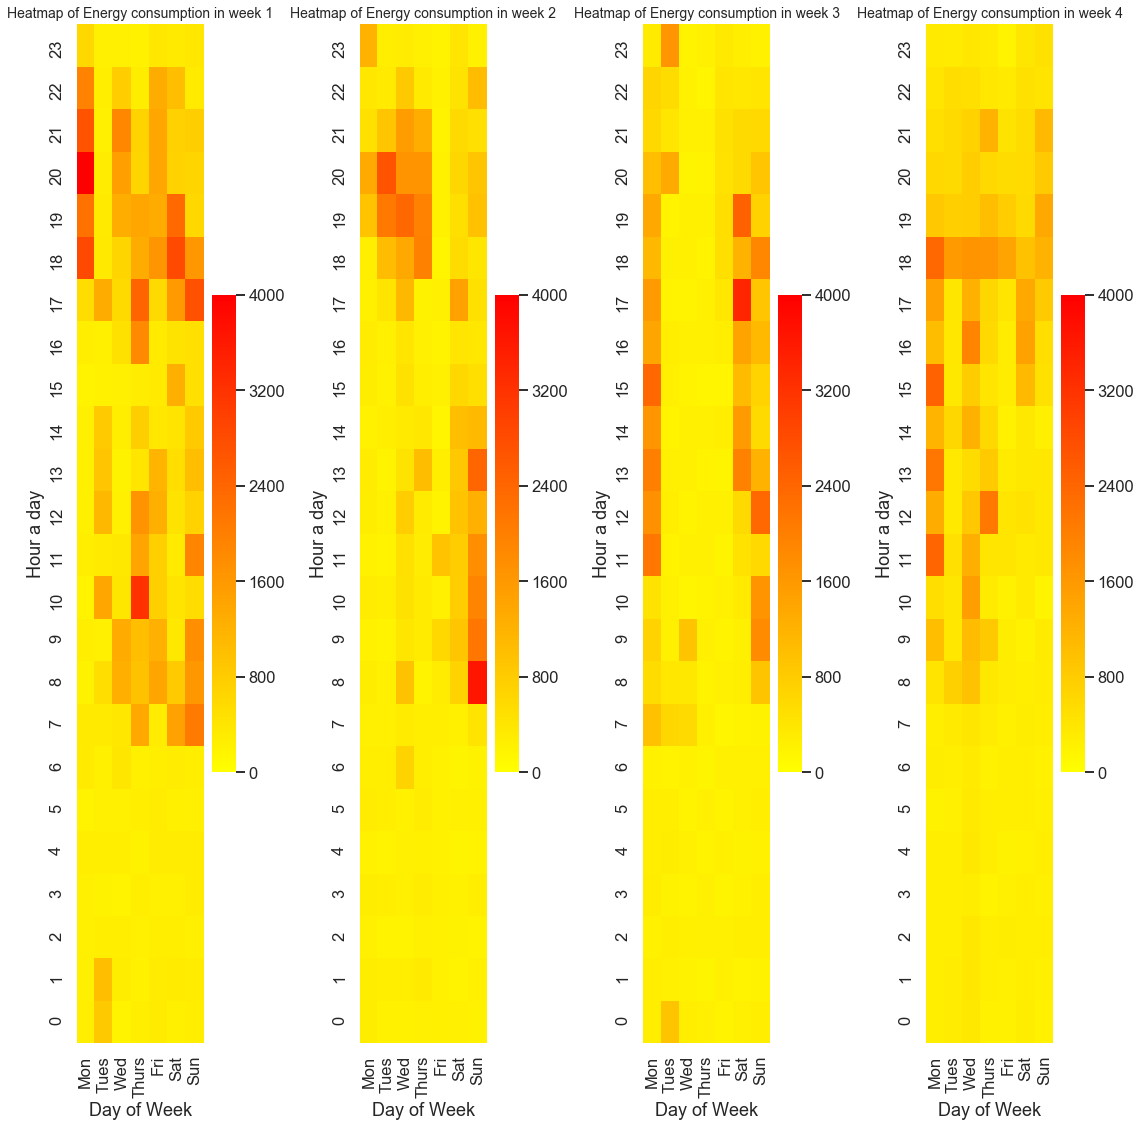

In [67]:
# import
from datetime import timedelta
d = timedelta(microseconds=-1)

#Create new date time as start_time_datetime and add weekday name and hour in them
Energy_data['start_time_datetime'] = pd.to_datetime(Energy_data['date'])
Energy_data['start_time_day_name'] = Energy_data['start_time_datetime'].dt.weekday_name
Energy_data['start_time_hour'] = Energy_data['start_time_datetime'].dt.hour

#Time period 
days = timedelta(days=7)
first_week = pd.Timestamp(2016,1,19)
second_week = first_week + days
third_week = second_week + days
fourth_week = third_week + days

week_1 = Energy_data[Energy_data['start_time_datetime'] < first_week]
week2 = Energy_data[first_week < Energy_data['start_time_datetime']] 
week_2 = week2[Energy_data['start_time_datetime'] < second_week]
week3 = Energy_data[second_week < Energy_data['start_time_datetime']] 
week_3 = week3[Energy_data['start_time_datetime'] < third_week]
week4 = Energy_data[third_week < Energy_data['start_time_datetime']] 
week_4 = week4[Energy_data['start_time_datetime'] < fourth_week]

# fisrt week
app_used1= pd.pivot_table(week_1[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour1 = app_used1.unstack(level=0)
app_amount_used_hour1 = app_amount_used_hour1.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)
# second week
app_used2= pd.pivot_table(week_2[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour2 = app_used2.unstack(level=0)
app_amount_used_hour2 = app_amount_used_hour2.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)
# third week
app_used3= pd.pivot_table(week_3[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour3 = app_used3.unstack(level=0)
app_amount_used_hour3 = app_amount_used_hour3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)

# fourth week
app_used4= pd.pivot_table(week_4[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour4 = app_used4.unstack(level=0)
app_amount_used_hour4 = app_amount_used_hour4.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)

#make variables for days and hours
hours = []
for hour in range(24):
    hours.append(hour)
    
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']


# Plotting heatamp
sns.set_context("talk")
fig, (ax1,ax2,ax3,ax4) = plt.subplots(figsize=(16, 16),ncols=4,)

# Week 1
ax1 = sns.heatmap(app_amount_used_hour1, annot=False, linewidths=0, ax=ax1,cmap="autumn_r", vmin=0, vmax=4000,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

ax1.axes.set_title("Heatmap of Energy consumption in week 1", fontsize=14, y=2)
ax1.set(xlabel='Day of Week', ylabel='Hour a day');
ax1.invert_yaxis()

# Week 2
ax2 = sns.heatmap(app_amount_used_hour2, annot=False, linewidths=0, ax=ax2,cmap="autumn_r", vmin=0, vmax=4000,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

ax2.axes.set_title("Heatmap of Energy consumption in week 2", fontsize=14, y=2)
ax2.set(xlabel='Day of Week', ylabel='Hour a day');
ax2.invert_yaxis()

# Week 3
ax3 = sns.heatmap(app_amount_used_hour3, annot=False, linewidths=0, ax=ax3,cmap="autumn_r", vmin=0, vmax=4000,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

ax3.axes.set_title("Heatmap of Energy consumption in week 3", fontsize=14, y=2)
ax3.set(xlabel='Day of Week', ylabel='Hour a day');
ax3.invert_yaxis()

# Week 4
ax4 = sns.heatmap(app_amount_used_hour4, annot=False, linewidths=0, ax=ax4,cmap="autumn_r", vmin=0, vmax=4000,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

ax4.axes.set_title("Heatmap of Energy consumption in week 4", fontsize=14, y=2)
ax4.set(xlabel='Day of Week', ylabel='Hour a day');
ax4.invert_yaxis()

fig.tight_layout()

## Comment on making this

I have used an example from [Dan Friedman's](https://dfrieds.com/data-visualizations/when-use-heatmaps) 'When to use heatmaps' and [CodeDump](https://codedump.io/share/K8Q5rHVeUFGS/1/heatmap-visualization) to make this heatmap. To get this colour, I went to this website [colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) to get the same colour in their heatmap. 

## Linear Regression

In [68]:
#Read data
train = pd.read_csv("Portfolio2_data/training.csv")
test = pd.read_csv("Portfolio2_data/testing.csv")

# drop date and add the rest into feature_col
train.drop(train.columns[0], axis=1, inplace=True)
feature_col = np.array(['lights', 'T1', 'RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7',
                         'T8','RH_8','T9', 'RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint',
                         'rv1','rv2','NSM'])
test.drop(test.columns[0], axis=1, inplace=True)

# Set Train and test 
X_train = train[feature_col]
y_train = train.Appliances
X_test = test[feature_col]
y_test = test.Appliances

# test model
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("y = ", model.coef_,"* X + ",model.intercept_)
print("MSE:", mean_squared_error (y_test, predicted))
print("R^2:", r2_score(y_test,predicted))


y =  [ 1.86660516e+00 -4.14497987e+00  1.44790183e+01 -1.78426597e+01
 -1.37115412e+01  2.76620233e+01  5.34759535e+00 -2.51528298e+00
 -7.94526199e-01 -1.50241017e+00  9.21698362e-02  7.37898919e+00
  3.26591065e-01  2.00333400e+00 -1.74131349e+00  8.10390686e+00
 -3.64205959e+00 -1.33516314e+01 -3.25454078e-01 -1.01102847e+01
  1.86447658e-01 -9.03894716e-01  1.82733594e+00  1.33901648e-01
  4.19325863e+00 -2.45927477e-02 -2.45927477e-02  2.94814485e-04] * X +  -40.03362523484286
MSE: 8754.269104277759
R^2: 0.15199183390308568


## Residual plot for the linear regression model

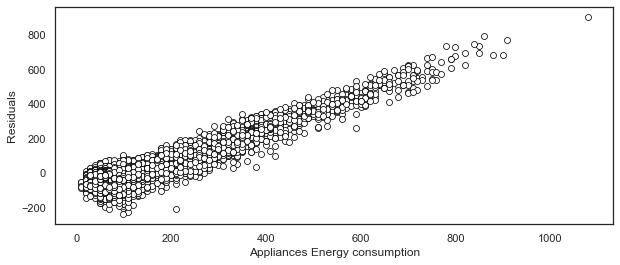

In [69]:
#Plotting it
sns.set(rc={'figure.figsize':(10,4)},style='white', font_scale=1)
y_hat = model.predict(X_train)
y = train['Appliances']
residual = y_train - y_hat
ax = sns.scatterplot(y,residual, color='white', edgecolor='black')
ax.set(xlabel='Appliances Energy consumption', ylabel='Residuals');

## Comments for my linear regression result

From the [Data driven prediction models of energy use of appliances in a low-energy house](https://github.com/LuisM78/Appliances-energy-prediction-data) I have used the **training** and **testing data** set from [git hub](https://github.com/LuisM78/Appliances-energy-prediction-data) that was provided for us to make this **linear regression model**.
The output of my model looks very similar to the output of their model and my calculations for the **mean squared error** and **r^2** can be assumed to be correct as they did not provide one. The reason I am assuming that my calculation may be correct, is because the model produced very similarly to their model. Also, I have used the examples from **week 10's tutorial class** for the training and testing data set: to train, test and drop unnecessary columns to produce this output.

## Recursive Feature Elimination

In [70]:
#fit my selected variables
estimator = LinearRegression()
selector = RFE(estimator, 28)
selector = selector.fit(X_train,y_train)
supp = selector.get_support()
print("Selected features:",feature_col[supp])
print("Coeffs:", selector.estimator_.coef_)

# test model
predicted = selector.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, predicted)))
print("R^2:", r2_score(y_test, predicted), "\n")

Selected features: ['lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5' 'RH_5' 'T6'
 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out' 'Press_mm_hg' 'RH_out'
 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2' 'NSM']
Coeffs: [ 1.86660516e+00 -4.14497987e+00  1.44790183e+01 -1.78426597e+01
 -1.37115412e+01  2.76620233e+01  5.34759535e+00 -2.51528298e+00
 -7.94526199e-01 -1.50241017e+00  9.21698362e-02  7.37898919e+00
  3.26591065e-01  2.00333400e+00 -1.74131349e+00  8.10390686e+00
 -3.64205959e+00 -1.33516314e+01 -3.25454078e-01 -1.01102847e+01
  1.86447658e-01 -9.03894716e-01  1.82733594e+00  1.33901648e-01
  4.19325863e+00 -2.45927477e-02 -2.45927477e-02  2.94814485e-04]
RMSE: 93.56425120887656
R^2: 0.15199183390308568 



## Comments for my RFE results

From the [Data driven prediction models of energy use of appliances in a low-energy house](https://github.com/LuisM78/Appliances-energy-prediction-data) their **RMSE** and **R^2** produced **93.21** and **0.18**, and my **RMSE** and **R^2** produced **93.56** and **0.15**. To produce the root-mean-square-error for my result, I have selected all **28 features** as they are all important features and used the training and data model from my previous workout for the linear regression model. The result of my **RMSE** and **R^2** is a bit more higher than their provided result due to the inconsistency of the each others randomly selected data.